# PCA and SVD: Dimensionality Reduction and Visualization
Dimensionality reduction is the task of deriving a set of new artificial features that is smaller than the original feature set while retaining most of the variance of the original data. Here we'll use a common but powerful dimensionality reduction technique called Principal Component Analysis (PCA).
We perform dimensionality reduction using first the singular value decomposition of the centered matrix and after the one computed by the PCA subroutine of sklearn. We work on the iris dataset.

## Import libraries

In [1]:
import numpy as np
import matplotlib.pylab as plt 
import scipy.linalg as la
import time
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from itertools import cycle

## Load the iris dataset

In [2]:
iris = load_iris()
X = iris.data # matrix with data
y = iris.target # vector with target
US = np.copy(X) # we copy to don't change X
print('Shape of iris dataset X: ', X.shape)
print('Shape of iris dataset y: ', y.shape)

Shape of iris dataset X:  (150, 4)
Shape of iris dataset y:  (150,)


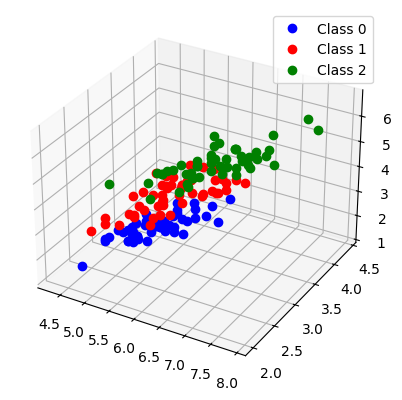

In [3]:
# we plot the dataset composed of 3 columns using a three-dimensional space
target=iris.target
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot(US[target==0,0],US[target==0,1],US[target==0,2],'bo')
ax.plot(US[target==1,0],US[target==1,1],US[target==1,2],'ro')
ax.plot(US[target==2,0],US[target==2,1],US[target==2,2],'go')
ax.legend(['Class 0', 'Class 1', 'Class 2'])

## PCA function of scikit-learn
PCA is performed using linear combinations of the original features using a Singular Value Decomposition of the matrix X to project the data onto a base of the top singular vectors. If the number of retained components is 2 or 3, PCA can be used
to visualize the dataset.
<b> The PCA function from scikit-learn have the following parameters: </b>
1) withen = TRUE the components are scaled to have unit variance (we divided by the standard deviation)
2) n_components = number of computed singular values, so we fit the PCA on the matrix X using exactly the number of components specified
3) copy = True the matrix X is not modified

In [4]:
whiten=True  
ncomp=2
pca = PCA(copy=True,n_components=ncomp,whiten=whiten).fit(X) 

Once fitted, the pca model exposes the singular vectors in the components_ attribute:

In [5]:
# direction of maximal variance are the vectors of the matrix V of the SVD
# these are the rows of V^T
print('Vectors of maximal variance (the rows od V^T, where V is the matrix of the SVD: \n', pca.components_ ) 
print(f'\nWe have only {ncomp} rows and {X.shape[1]} columns because the original matrix was {X.shape}.\n'
      f'The matrix V should be {X.shape[1]}*{X.shape[1]}, but since we have required only '
      f'{ncomp} directions, we obtain a matrix of size {ncomp}*{X.shape[1]}.')

Vectors of maximal variance (the rows od V^T, where V is the matrix of the SVD: 
 [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]

We have only 2 rows and 4 columns because the original matrix was (150, 4).
The matrix V should be 4*4, but since we have required only 2 directions, we obtain a matrix of size 2*4.


Let us project the iris dataset along those first two dimensions:

In [6]:
# "transform" function multiplies the vectors of the basis of 
# the range of the matrix times the singular values, 
# which are the principal directions
X_pca = pca.transform(X)
print('Shape of the iris dataset after reduction: ',X_pca.shape)

Shape of the iris dataset after reduction:  (150, 2)


## Let us compare these results with the singular value decomposition results
To apply the SVD on the same dataset we need to subtract the mean from each column of the matrix.

In [7]:
AS = np.copy(np.asarray(X))
(nb, na) = AS.shape
meanAS=np.mean(AS,axis=0).reshape(1,na)
print('mean of the columns',meanAS)

mean of the columns [[5.84333333 3.05733333 3.758      1.19933333]]


Now we can compute the subtraction in two different ways. 
1) In the first way, we perform the outer product between the vector of all ones and the vector of the mean. We obtain a matrix such that for each column we have the means of that column. Then we compute subtraction between two matrices of same size.
2) In the second way, we do the same operation but in a very compact way. This approach is more efficient.

We can check that we obtain the same results.

In [8]:
# subtract the mean 
e = np.ones((nb,1))  
AS = AS - np.dot(e,meanAS) # outer product using matrix operation
print('mean of the columns after ', np.mean(AS,axis=0)) 

As1 = np.copy(np.asarray(X))
As1 -=  meanAS # compacted outer product it is the same as using the outer product
print('mean of the columns after ', np.mean(As1,axis=0)) 

mean of the columns after  [-1.12502600e-15 -7.60872846e-16 -2.55203266e-15 -4.48530102e-16]
mean of the columns after  [-1.12502600e-15 -7.60872846e-16 -2.55203266e-15 -4.48530102e-16]


Using withen=True, we have performed a standardization of the dataset, which means that the data are now centered with unit variance. Using both SVD and PCA, we obtain the same singular vector matrix / principal component direction V but with different sign.

In [9]:
# compute the SVD
U, s, Vh = la.svd(AS,full_matrices=False) # we obtain U, Sigma and V^T (Vh is the transpose)
US=np.copy(U)

if whiten:
 US = US[:,0:ncomp]*s[0:ncomp] # compact form of the product U*diag(s)
 stdUS = np.std(US,axis=0,ddof=1) # the standard deviation is computed by dividing by sqrt(N-ddof)
 US = US/stdUS # compact form 
else:
 US = US[:,0:ncomp]*s[0:ncomp]

print('Vh obtaine with SVD')
print(Vh[0:ncomp,:])

print('\npca_components obtained with PCA')
print(pca.components_)

# to check the equality, we compare the ratio element by element
print('\nX_pca ratio with U_i*s_i')
print(np.max(abs(X_pca/(US[:,0:ncomp]))),np.min(abs(X_pca/(US[:,0:ncomp]))))

Vh obtaine with SVD
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [-0.65658877 -0.73016143  0.17337266  0.07548102]]

pca_components obtained with PCA
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]

X_pca ratio with U_i*s_i
1.0000000000000209 0.9999999999999342


In [10]:
print('X_pca.mean:\n', X_pca.mean(axis=0))
print('\nX_pca.std (rounded):\n',np.round(X_pca.std(axis=0,ddof=1), decimals=15))

X_pca.mean:
 [-1.45365201e-15 -1.76747506e-15]

X_pca.std (rounded):
 [1. 1.]


Furthermore, the samples components do no longer carry any linear correlation; the correlation matrix is the identity matrix. The columns of the reduced matrix are not correlated, and in fact, the columns of the X_pca are orthogonal. If we perform the inner product between the columns, this will be zero. Then, we compute also the covariance matrix, which is equal to the correlation matrix in this example.

In [11]:
print('Correlation matrix of X_pca:\n', np.round(np.corrcoef(X_pca.T), decimals=5))
print('\nCovariance matrix of X_pca:\n', np.round(np.cov(X_pca.T), decimals=5))

Correlation matrix of X_pca:
 [[1. 0.]
 [0. 1.]]

Covariance matrix of X_pca:
 [[1. 0.]
 [0. 1.]]


Now we can visualize the results using the following utility function:

In [12]:
def plot_PCA_1D(data, target, target_names):
    colors = cycle('rgbcmykw')
    target_ids = range(len(target_names))
    plt.figure()
    for i, c, label in zip(target_ids, colors, target_names):
          plt.plot(data[target == i, 0],
                   c=c, label=label,marker='o',linestyle = 'None')
    plt.legend()

def plot_PCA_2D(data, target, target_names):
    colors = cycle('rgbcmykw')
    target_ids = range(len(target_names))
    plt.figure()
    for i, c, label in zip(target_ids, colors, target_names):
          plt.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label)
    plt.legend()

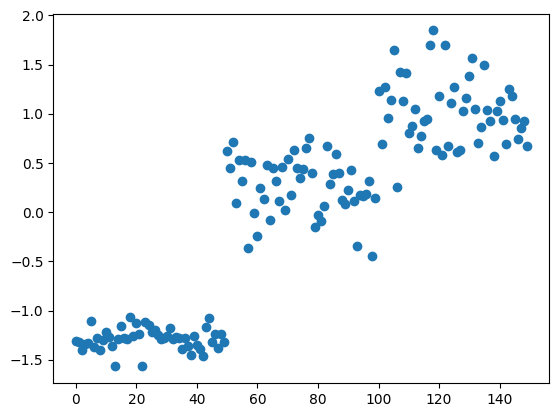

In [13]:
plt.plot(X_pca[:,0],marker='o',linestyle = 'None')

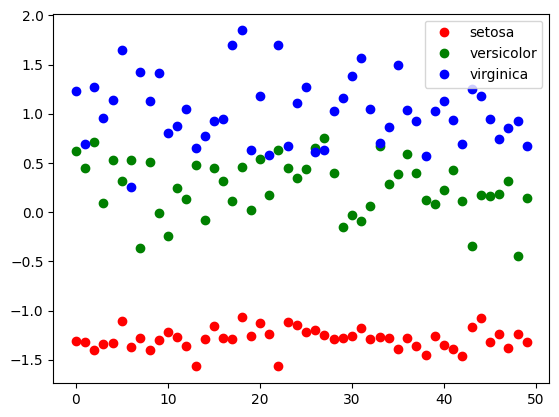

In [14]:
plot_PCA_1D(X_pca, iris.target, iris.target_names)

Note that this projection was determined *without* any information about the labels (represented by the colors): this is the sense in which the learning is unsupervised. Nevertheless, we see that the projection gives us insight into the distribution of the different flowers in parameter space: notably, *iris setosa* is much more distinct than the other two species.

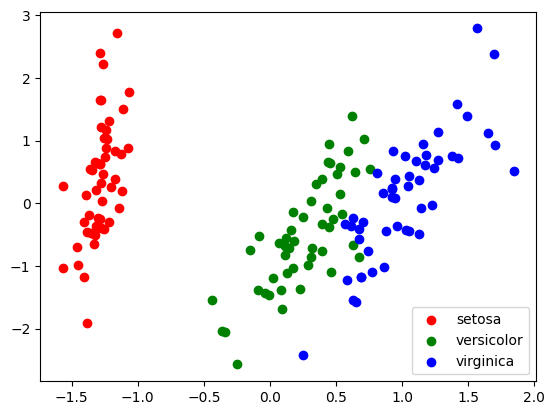

In [15]:
plot_PCA_2D(X_pca, iris.target, iris.target_names)

Now if we plot the original dataset and compare it with the one reduced using the PCA, we can see the difference and how now the different target class are well separated.

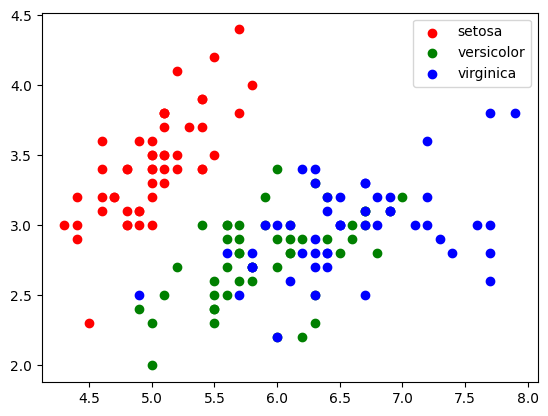

In [16]:
plot_PCA_2D(X, iris.target, iris.target_names)

## Comparing solution between different SVD solver for PCA function
Note also that the default implementation of PCA computes the SVD of the full data matrix, which is not scalable when both ``n_samples`` and ``n_features`` are big (more than a few thousands). If you are interested in a number of components that is much smaller than both ``n_samples`` and ``n_features``, consider using special solvers for svd 'arpack' or 'randomized'.
1) svd_solver = default: compute the SVD for full matrix and compute all the singular values (not good if we need only a few singular values)
2) svd_solver = randomized: very useful when the matrix is large and sparse
3) svd_solver = arpack: used an iterative algorithm that computes few singular values and uses as tool only matrix multiplication. Useful when we would like to compute only few singular values or with sparse and large matrix.

### SVD_solver = randomized

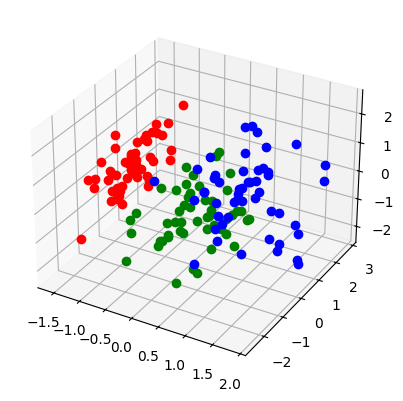

In [17]:
pca = PCA(copy=True,n_components=3, whiten=True,svd_solver='randomized').fit(X)
US = pca.transform(X)
target=iris.target

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(US[target==0,0],US[target==0,1],US[target==0,2],'ro')
ax.plot(US[target==1,0],US[target==1,1],US[target==1,2],'go')
ax.plot(US[target==2,0],US[target==2,1],US[target==2,2],'bo')

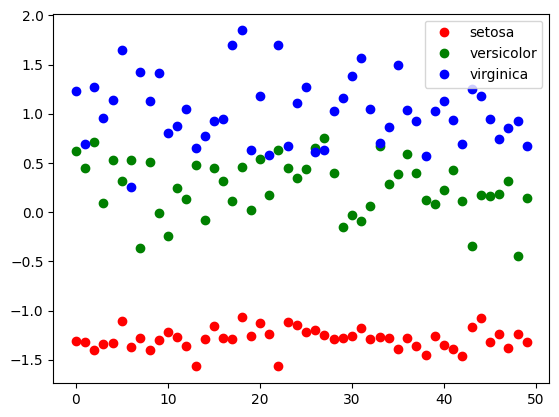

In [18]:
plot_PCA_1D(X_pca, iris.target, iris.target_names)

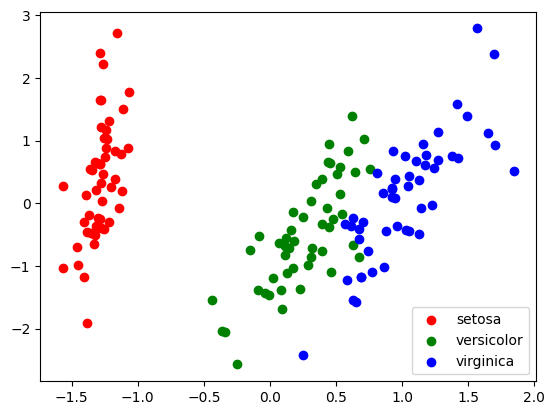

In [19]:
plot_PCA_2D(X_pca, iris.target, iris.target_names)

### SVD_solver = arpack

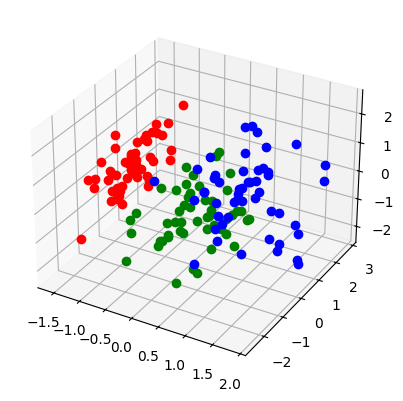

In [20]:
pca = PCA(copy=True,n_components=3, whiten=True,svd_solver='arpack').fit(X)
US = pca.transform(X)
target=iris.target

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(US[target==0,0],US[target==0,1],US[target==0,2],'ro')
ax.plot(US[target==1,0],US[target==1,1],US[target==1,2],'go')
ax.plot(US[target==2,0],US[target==2,1],US[target==2,2],'bo')

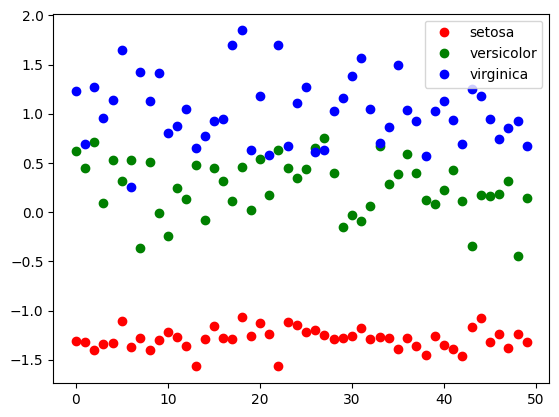

In [21]:
plot_PCA_1D(X_pca, iris.target, iris.target_names)

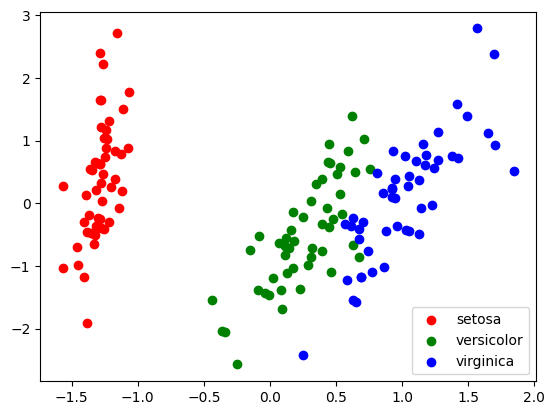

In [22]:
plot_PCA_2D(X_pca, iris.target, iris.target_names)

## Comparing the computational time required to perform PCA with different svd solver

In [23]:
t1=time.process_time()
pca = PCA(copy=True,n_components=ncomp).fit(X)
US = pca.transform(X)
t2d=time.process_time()-t1
print( "clock default solver = ", t2d)

t1=time.process_time()
pca = PCA(copy=True,n_components=ncomp,svd_solver='randomized').fit(X)
US = pca.transform(X)
t2d=time.process_time()-t1
print( "clock randomized solver = ", t2d )

t1=time.process_time()
pca = PCA(copy=True,n_components=ncomp,svd_solver='arpack').fit(X)
US = pca.transform(X)
t2d=time.process_time()-t1
print( "clock arpack solver = ", t2d )

clock default solver =  0.0
clock randomized solver =  0.015625
clock arpack solver =  0.0
